In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lab2 as lab2

# LAB 2
### 3.1 Batch mode training using least squares

MSE sin(2x): 0.0003989535215540651


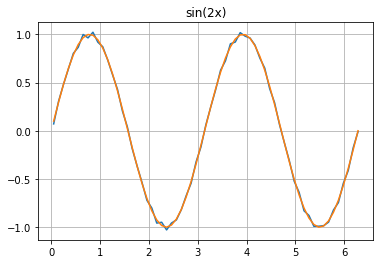

MSE square(2x): 0.049287645416534145


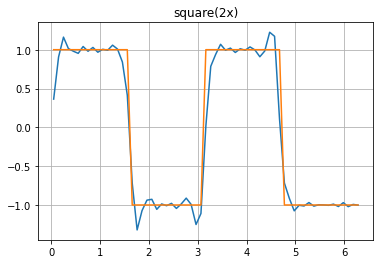

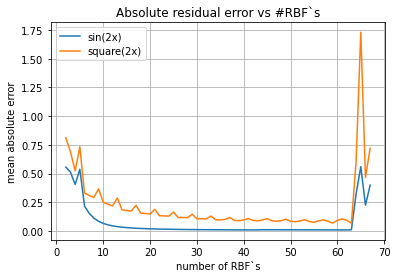

In [3]:
## Generating data
N = round(2*np.pi/0.1)
x_train = np.linspace(0, 2*np.pi,N)
yf1_train = np.sin(2*x_train)
yf2_train = np.sign(yf1_train)
x_valid = np.linspace(0.05, 2*np.pi,N)
yf1_valid = np.sin(2*x_valid)
yf2_valid = np.sign(yf1_valid)

## Place RBF's manually
N = 30 #Number of RBF's
mu = np.linspace(0,2*np.pi,N) # Data is one-dimensional
sigma = 0.1*np.ones(N)

## Sine function
w = lab2.least_squares(x_train,yf1_train,mu,sigma)
yf1_pred = lab2.forward(x_valid,w,mu,sigma)
mse1 = np.mean((yf1_pred-yf1_valid)**2)
print('MSE sin(2x): ' + str(mse1))

fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('sin(2x)')
ax.plot(x_valid,yf1_pred)
ax.plot(x_valid,yf1_valid)
plt.show()

## Square function
w = lab2.least_squares(x_train,yf2_train,mu,sigma)
yf2_pred = lab2.forward(x_valid,w,mu,sigma)
mse2 = np.mean((yf2_pred-yf2_valid)**2)
print('MSE square(2x): ' + str(mse2))

fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('square(2x)')
ax.plot(x_valid,yf2_pred)
ax.plot(x_valid,yf2_valid)
plt.show()

## Varying to number of units to get below absolute residual error of 0.1, 0.01, 0.001
maxN = 67
are_sin = np.zeros(maxN-1)
are_square = np.zeros(maxN-1)
for i in np.linspace(2,maxN,maxN-1):
    N = int(i) #Number of RBF's
    mu = np.linspace(0,2*np.pi,N) # Data is one-dimensional
    sigma = np.pi/i*np.ones(N) # Smaller sigma when many RBF's
    
    w = lab2.least_squares(x_train,yf1_train,mu,sigma)
    yf1_pred = lab2.forward(x_valid,w,mu,sigma)
    are_sin[N-2] = np.mean(np.abs(yf1_pred-yf1_valid))

    w = lab2.least_squares(x_train,yf2_train,mu,sigma)
    yf2_pred = lab2.forward(x_valid,w,mu,sigma)
    are_square[N-2] = np.mean(np.abs(yf2_pred-yf2_valid))

fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Absolute residual error vs #RBF`s')
ax.plot(np.linspace(2,maxN,maxN-1),are_sin)
ax.plot(np.linspace(2,maxN,maxN-1),are_square)
ax.set_xlabel('number of RBF`s')
ax.set_ylabel('mean absolute error')
ax.legend(['sin(2x)','square(2x)'])
plt.show()

### 3.2 Regression with noise
Runtime about 2 min

In [9]:
## Making data noisy
x_train = x_train + np.random.normal(0,0.1,round(2*np.pi/0.1))
x_valid = x_valid + np.random.normal(0,0.1,round(2*np.pi/0.1))

lr = 0.2
epochs = 50

## Varying to number of units using delta
maxN = 67
stds = [10,8,6,4,2]
are = np.zeros([maxN-1,5])

for i in np.linspace(2,maxN,maxN-1):
    for j in range(5):
        N = int(i) #Number of RBF's
        mu = np.linspace(0,2*np.pi,N) # Data is one-dimensional
        sigma = stds[j]/i*np.ones(N) # Smaller sigma when many RBF's
    
        w = lab2.delta_rule(x_train,yf1_train,mu,sigma,lr,epochs)
        yf1_pred = lab2.forward(x_valid,w,mu,sigma)
        are[N-2,j] = np.mean(np.abs(yf1_pred-yf1_valid))
        
fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('Absolute residual error vs #RBF`s')
for i in range(5):
    ax.plot(np.linspace(2,maxN,maxN-1),are[:,i])
ax.set_xlabel('number of RBF`s')
ax.set_ylabel('mean absolute error')
ax.legend(['sigma*N = ' + str(stds[0]),'sigma*N = ' + str(stds[1]),'sigma*N = ' + str(stds[2]),'sigma*N = ' + str(stds[3]),'sigma*N = ' + str(stds[4])])
plt.show()

KeyboardInterrupt: 

In [10]:
## What if RBF's are randomly initialised?

N = 30
ARE = []
mu = np.random.normal(0,2*np.pi,N) # Data is one-dimensional
sigma = stds[j]/N*np.ones(N) # Smaller sigma when many RBF's
w = lab2.delta_rule(x_train,yf1_train,mu,sigma,lr,epochs)
yf1_pred = lab2.forward(x_valid,w,mu,sigma)
ARE = np.mean(np.abs(yf1_pred-yf1_valid))
print('ARE random initialised RBFs: ' + str(ARE))

## And on clean data:
x_train = np.linspace(0, 2*np.pi,round(2*np.pi/0.1))
x_valid = np.linspace(0.05, 2*np.pi,round(2*np.pi/0.1))

w = lab2.delta_rule(x_train,yf1_train,mu,sigma,lr,epochs)
yf1_pred = lab2.forward(x_valid,w,mu,sigma)
ARE = np.mean(np.abs(yf1_pred-yf1_valid))
print('ARE random initialised RBFs (on clean data): ' + str(ARE))


ARE random initialised RBFs: 0.3557168947099384
ARE random initialised RBFs (on clean data): 0.32801038403860544


In [ ]:
## TO-DO: comparisson with MLP with equal nodes in hidden layer

### 3.3 Competitive learning (CL) to initialise RBF units

ARE CL initialised RBFs: 0.18901122262260597


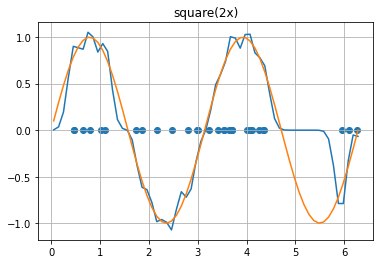

In [14]:
mu, sigma = lab2.CL_initialisation(x_train,1,30,0.125,50,3,0.05)
w = lab2.delta_rule(x_train,yf1_train,mu,sigma,lr,epochs)
yf1_pred = lab2.forward(x_valid,w,mu,sigma)
ARE = np.mean(np.abs(yf1_pred-yf1_valid))
print('ARE CL initialised RBFs: ' + str(ARE))

fig, ax = plt.subplots()
ax.grid(visible = True)
ax.set_title('square(2x)')
ax.plot(x_valid,yf1_pred)
ax.plot(x_valid,yf1_valid)
ax.scatter(mu,np.zeros(N))
plt.show()

In [17]:
## Two-dimensional
# load data
ballist = np.loadtxt('ballist.dat', unpack = True)
balltest = np.loadtxt('balltest.dat', unpack = True)

sz = np.shape(ballist)
x_train = np.zeros((2,sz[-1]))
x_train[0,:] = ballist[0,:] #python does stupid with matrices so it takes way more lines of code than should be needed
x_train[1,:] = ballist[1,:]

y_train = np.zeros((2,sz[-1]))
y_train[0,:] = ballist[2,:] 
y_train[1,:] = ballist[3,:]

sz = np.shape(balltest)
x_valid = np.zeros((2,sz[-1]))
x_valid[0,:] = balltest[0,:] 
x_valid[1,:] = balltest[1,:]

y_valid = np.zeros((2,sz[-1]))
y_valid[0,:] = balltest[2,:] 
y_valid[1,:] = balltest[3,:]

# parameters
N = 30, 
s = 0.125, 
epochs = 50, 
n_winners = 5, 
lr = 0.2

# run
mu,sigma = lab2.CL_initialisation(x_train,2,N,s,epochs,n_winners,lr)
w = lab2.delta_rule(x_train,yf1_train,mu,sigma,lr,epochs)
yf1_pred = lab2.forward(x_valid,w,mu,sigma)
ARE = np.mean(np.abs(yf1_pred-yf1_valid))
print('ARE CL initialised RBFs: ' + str(ARE))

TypeError: 'builtin_function_or_method' object is not subscriptable

## PART 2
### 4.1 Topological Ordering of Animal Species

### 4.2 Cyclic Tour

### 4.3 Data Clustering: Votes of MPs